In [24]:
from owslib.wfs import WebFeatureService

# URL for WFS backend
url = "https://geodata.nationaalgeoregister.nl/asbestscholenkaart/wfs?service=WFS"

# See details about this particular WFS
# -------------------------------------

# Initialize
wfs = WebFeatureService(url=url)

# Service provider 
print(wfs.identification.title)

# Get WFS version
print(wfs.version)

# Available methods
print([operation.name for operation in wfs.operations])

# Available data layers
print(list(wfs.contents))

# Print all metadata of all layers
for layer, meta in wfs.items():
    print(meta.__dict__)

In [30]:
import geopandas as gpd
from requests import Request
from owslib.wfs import WebFeatureService

# URL for WFS backend
url = "https://geodata.nationaalgeoregister.nl/asbestscholenkaart/wfs"

# Initialize
wfs = WebFeatureService(url=url)

# Get data from WFS
# -----------------

# Fetch the last available layer (as an example) --> 'vaestoruutu:vaki2017_5km'
layer = list(wfs.contents)[-1]

# Specify the parameters for fetching the data
params = dict(service='WFS', request='GetFeature',
      typeName="asbestscholenkaart:asbestscholenkaart",StartIndex='0', outputFormat='json')

# Parse the URL with parameters
q = Request('GET', url, params=params).prepare().url
q
# Read data from URL
data2 = gpd.read_file(q)
data2

,id,brin_vest_,soort_instelling,naam_vestiging,plaatsnaam,straatnaam,postcode,huisnummer,huisnummer_toevoeging,x_y_coordinaten,...,enquete,inventaris,asbest_aanwezig,asbest_verwijderd,dubbel,bouwjaar_bag,pand_bag_id,pandvlak,categorie,geometry
0,asbestscholenkaart.10548,11VF00,BO,OBS Het Noorderlicht,HARLINGEN,F Domela Nieuwenhuisstr,8862WC,81,None,POINT(158809.0 575829.0 0.0),...,Ja,None,None,None,None,2008,0072100000293448,"POLYGON(( 158465.749 575108.811 0.0, 158458.39...",0,"MULTIPOLYGON (((158465.749 575108.811, 158466...."
1,asbestscholenkaart.10549,12NY00,BO,E.P. de Boer Basisschool,WIJNALDUM,Buorren,8857BL,10,None,POINT(160070.0 578714.0 0.0),...,Nee,None,None,None,None,1990,0072100000294119,"POLYGON(( 160058.084 578731.042 0.0, 160056.94...",0,"MULTIPOLYGON (((160058.084 578731.042, 160052...."
2,asbestscholenkaart.10550,10XU00,BO,CBS Het Baken,HARLINGEN,J v Oldenbarneveltstr,8862BB,4,None,POINT(158308.0 575569.0 0.0),...,Ja,None,None,None,None,2005,0072100000296212,"POLYGON(( 157858.074 575766.3 0.0, 157861.868 ...",0,"MULTIPOLYGON (((157858.074 575766.300, 157861...."
3,asbestscholenkaart.10551,15SG00,BO,Tjongerschool,MILDAM,Schoterlandseweg,8454KD,95,None,POINT(196525.0 550168.0 0.0),...,Nee,None,None,None,None,1975,0074100000331627,"POLYGON(( 196486.716 550227.424 0.0, 196493.92...",0,"MULTIPOLYGON (((196486.716 550227.424, 196492...."
4,asbestscholenkaart.10552,27RK00,BO,o.b.s. Het Slingertouw,HEERENVEEN,Schoterplein,8448RP,29,None,POINT(192576.0 552034.0 0.0),...,Nee,None,None,None,None,2008,0074100000331689,"POLYGON(( 192728.746 552680.572 0.0, 192728.68...",0,"MULTIPOLYGON (((192728.746 552680.572, 192728...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8333,asbestscholenkaart.18881,10EE00,BO,OBS t Wad,HARLINGEN,Midlumerlaan,8861JE,13,None,POINT(157474.0 576741.0 0.0),...,Nee,None,None,None,None,1998,0072100000287053,"POLYGON(( 157457.363 576760.375 0.0, 157451.95...",0,"MULTIPOLYGON (((157457.363 576760.375, 157456...."
8334,asbestscholenkaart.18882,05BJ00,BO,basisschool Sint Michael,HARLINGEN,Schritsen,8861CV,52,None,POINT(157063.0 576274.0 0.0),...,Nee,None,None,None,None,2008,0072100000287224,"POLYGON(( 157100.099 576283.568 0.0, 157048.23...",0,"MULTIPOLYGON (((157100.099 576283.568, 157098...."
8335,asbestscholenkaart.18883,01KL09,VO,Noordzee Onderwijs Groep,HARLINGEN,Almenumerweg,8861KM,1,None,POINT(157657.0 576026.0 0.0),...,Ja,"Ja, van alles",Ja,"Ja, alles",None,2007,0072100000288843,"POLYGON(( 157778.318 576062.046 0.0, 157856.89...",1,"MULTIPOLYGON (((157778.318 576062.046, 157776...."
8336,asbestscholenkaart.18884,14DC00,VO,Reg SGM Simon Vestdyk,HARLINGEN,Koningin Julianastraat,8862TA,3,None,POINT(157531.0 575826.0 0.0),...,Ja,Nee,None,None,None,1993,0072100000290022,"POLYGON(( 157533.826 575882.048 0.0, 157521.23...",0,"MULTIPOLYGON (((157533.826 575882.048, 157541...."


In [31]:
import geopandas as gpd
from requests import Request
from owslib.wfs import WebFeatureService
def wfs_kadaster(url,type_param):
 wfs = WebFeatureService(url=url)
 layer = list(wfs.contents)[-1]
 params = dict(service='WFS', request='GetFeature',typeName=type_param ,StartIndex='0', outputFormat='json')
 q = Request('GET', url, params=params).prepare().url
 return gpd.read_file(q)


In [36]:
data = wfs_kadaster("https://geodata.nationaalgeoregister.nl/bestuurlijkegrenzen/wfs","bestuurlijkegrenzen:gemeenten")


In [37]:
data

,id,code,gemeentenaam,geometry
0,gemeenten.1,0363,Amsterdam,"MULTIPOLYGON (((121530.960 481721.580, 121538...."
1,gemeenten.2,0779,Geertruidenberg,"POLYGON ((118023.403 410633.367, 118023.150 41..."
2,gemeenten.3,0396,Heemskerk,"POLYGON ((106417.986 501332.539, 106417.608 50..."
3,gemeenten.4,0796,'s-Hertogenbosch,"POLYGON ((154123.546 418300.020, 154108.615 41..."
4,gemeenten.5,1894,Peel en Maas,"POLYGON ((196820.750 366540.034, 197129.026 36..."
...,...,...,...,...
350,gemeenten.351,0377,Bloemendaal,"POLYGON ((100185.713 481464.380, 100198.590 48..."
351,gemeenten.352,0352,Wijk bij Duurstede,"POLYGON ((147047.442 443642.975, 147035.180 44..."
352,gemeenten.353,0262,Lochem,"POLYGON ((230386.726 460481.310, 230385.489 46..."
353,gemeenten.354,0034,Almere,"POLYGON ((144833.081 481775.017, 146293.300 48..."


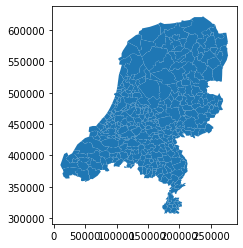

In [38]:
data.plot()